In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from PIL import Image, ImageDraw

In [3]:
data_10 = []

with open('Quickdraw/full_raw_airplane.ndjson') as file:
    for i in range(10):    
        data_10.append(json.loads(file.readline()))



In [4]:
one = data_10[3]

In [6]:
raw_drawing = one['drawing']

In [7]:
def get_img(doodle_data):
    
    fig, ax = plt.subplots(figsize=(2.55, 2.55))

    for stroke in doodle_data:
        x, y, _ = stroke  
        plt.plot(x,y)

    plt.gca().invert_yaxis()
    ax.axis('off')

    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    plt.close(fig)

    image_gray = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])

    return image_gray

In [33]:

def get_img(doodle_data, img_size=(256, 256), padding=0.2):
    image = Image.new("L", img_size, 255)
    draw = ImageDraw.Draw(image)

    x_min = min(min(stroke[0]) for stroke in doodle_data)
    x_max = max(max(stroke[0]) for stroke in doodle_data)
    y_min = min(min(stroke[1]) for stroke in doodle_data)
    y_max = max(max(stroke[1]) for stroke in doodle_data)

    doodle_width = x_max - x_min
    doodle_height = y_max - y_min

    available_width = img_size[0] * (1 - padding)
    available_height = img_size[1] * (1 - padding)

    aspect_ratio = doodle_width / doodle_height if doodle_height != 0 else 1
    img_aspect_ratio = available_width / available_height

    if aspect_ratio > img_aspect_ratio:
        scale = available_width / doodle_width
    else:
        scale = available_height / doodle_height

    x_offset = (img_size[0] - doodle_width * scale) / 2
    y_offset = (img_size[1] - doodle_height * scale) / 2

    for stroke in doodle_data:
        x, y, _ = stroke

        scaled_x = [x_offset + (v - x_min) * scale for v in x]
        scaled_y = [y_offset + (v - y_min) * scale for v in y]

        draw.line(list(zip(scaled_x, scaled_y)), fill=0, width=2)

    image_gray = np.array(image)

    return image_gray


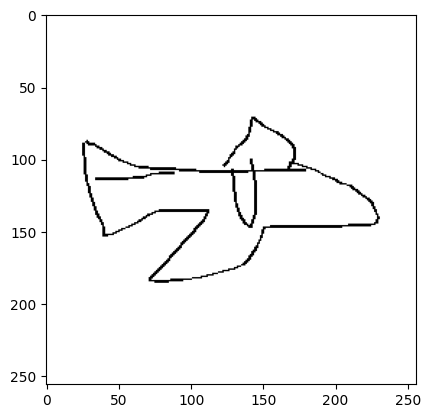

In [37]:
img = get_img(data_10[9]['drawing'])
plt.imshow(img, cmap='gray')

In [105]:
img.shape

(254, 254)

In [106]:
254 * 254

64516